In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
lr = LinearRegression()

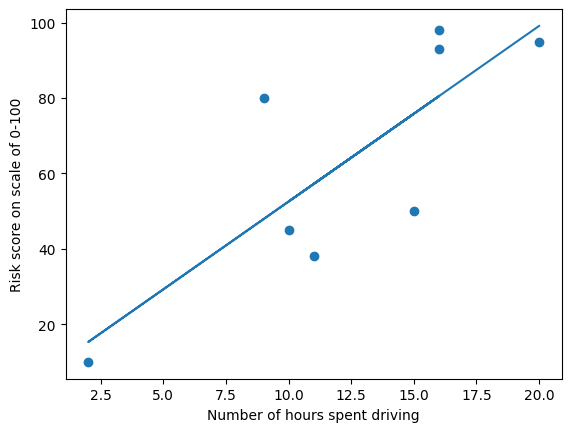

In [3]:
X = np.array([ 20,9,2, 15, 10, 16, 11, 16], dtype=np.float64)
y = np.array([95, 80, 10, 50, 45, 98, 38, 93], dtype=np.float64)
lr.fit(X.reshape(-1,1),y.reshape(-1,1))
line_y = lr.predict(X.reshape(-1,1))
plt.plot(X,line_y)
plt.scatter(X,y)
plt.xlabel('Number of hours spent driving')
plt.ylabel('Risk score on scale of 0-100')
plt.show()

In [4]:
lr.coef_

array([[4.65920826]])

In [5]:
lr.intercept_

array([5.96729776])

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()

In [8]:
boston.data.shape

(506, 13)

In [9]:
boston.target.shape

(506,)

In [10]:
import pandas as pd
pd.DataFrame(boston.data, columns=boston.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston.data,
boston.target, test_size=0.1)
lr = LinearRegression(normalize=True)
lr.fit(X_train, Y_train)

c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [12]:
lr.score(X_test, Y_test)

0.649116493890503

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, boston.data, boston.target, cv=7,
scoring='neg_mean_squared_error')

c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To r

In [14]:
scores.mean()

-37.28723086835304

In [15]:
scores.std()

46.78955638801988

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, boston.data, boston.target, cv=10,
scoring='r2')

c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To r

In [17]:
scores.mean()

0.2025289900605644

In [18]:
scores.std()

0.595296016951225

In [19]:
print('y = ' + str(lr.intercept_) + ' ')

y = 32.57062535919786 


In [20]:
for i, c in enumerate(lr.coef_):
    print(str(c) + ' * x' + str(i))

-0.09340688146182882 * x0
0.04157079728990521 * x1
0.02673737664031699 * x2
3.014873101183674 * x3
-17.801877555077063 * x4
4.386467321250646 * x5
-0.01027067144728397 * x6
-1.4873509377807221 * x7
0.26987107838976 * x8
-0.012187019137152533 * x9
-0.9481321175328203 * x10
0.009618328848797205 * x11
-0.4379737124566887 * x12


In [21]:
from sklearn.linear_model import LinearRegression, Ridge
lr = LinearRegression(normalize=True)

In [22]:
rg = Ridge(0.001, normalize=True)
lr_scores = cross_val_score(lr, boston.data, boston.target, cv=10)
lr_scores.mean()

c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To r

0.2025289900605644

In [23]:
rg_scores = cross_val_score(rg, boston.data, boston.target, cv=10)
rg_scores.mean()

c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Stan

0.2051661297211719

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

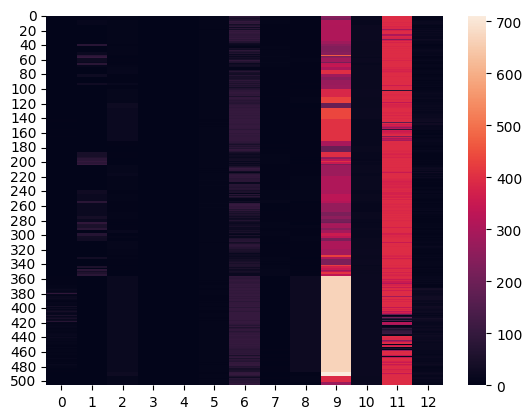

In [25]:
sns.heatmap(boston.data)
plt.show()

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

In [27]:
X = np.array([ 10,9,2, 15, 10, 16, 11, 16], dtype=np.float64)
y = np.array([95, 80, 10, 50, 45, 98, 38, 93], dtype=np.float64)
m = (((mean(X)* mean(y)) - mean(X*y)) / ((mean(X)*mean(X)) - mean(X*X)))
b = mean(y) - m*mean(X)
line_y = [res for res in (m*X+b)]

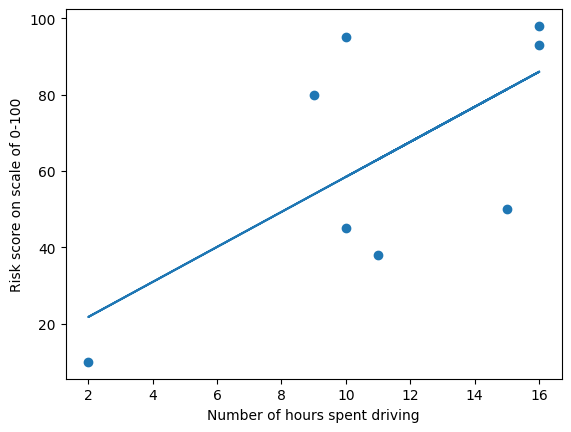

In [29]:
plt.plot(X, line_y)
plt.scatter(X, y)
plt.xlabel('Number of hours spent driving')
plt.ylabel('Risk score on scale of 0-100')
plt.show()

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [32]:
dataset = pd.read_csv('weather.csv')

In [34]:
dataset.shape

(366, 22)

In [35]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


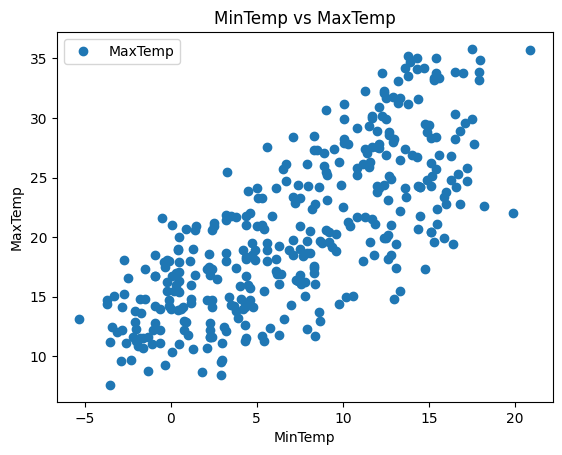

In [36]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o') 
plt.title('MinTemp vs MaxTemp') 
plt.xlabel('MinTemp') 
plt.ylabel('MaxTemp') 
plt.show()

In [37]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
print(regressor.intercept_)
print(regressor.coef_)

[14.56202411]
[[0.81953755]]


In [42]:
y_pred = regressor.predict(X_test)

In [43]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


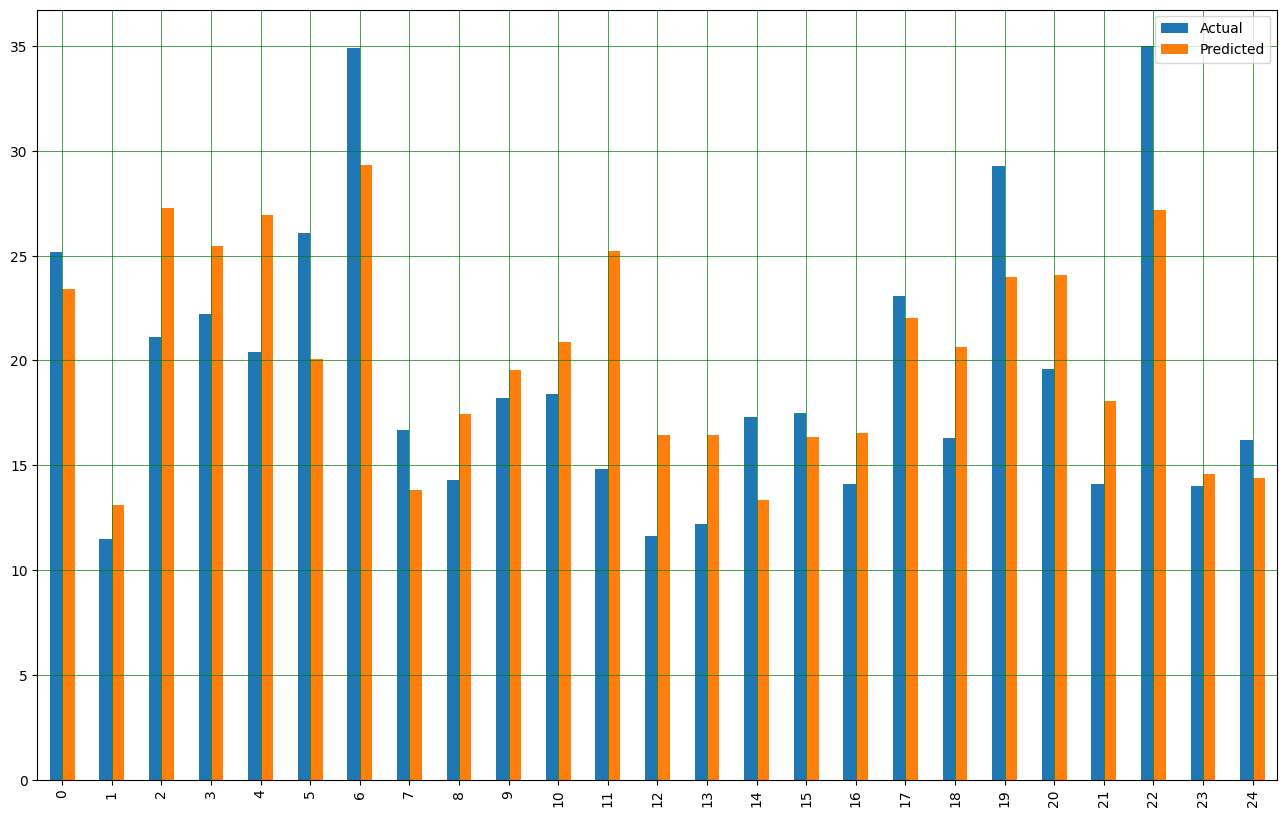

In [44]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.5094353112899594
Mean Squared Error: 17.011877668640622
Root Mean Squared Error: 4.124545753006096
